In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/citives.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [15]:
# List for holding lat_lngs and cities
coords = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coords = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [67]:
max_temp = []
humidity = []
cloudiness = []
wind = []
city_lat = []
city_long = []
country = []
date = []
city_name = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [70]:
print('Beginning Data Retrieval')
print('--------------------------------')

#loop to get information from the cities

i = 0
set_counter = 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        city_long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {i} of Set {set_counter} | {city}')
        if i == 49:
            i = 0
            set_counter += 1
        else:
            i += 1
    except(KeyError):
        print("City not found. Skipping...")
        
        
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 1 | ushuaia
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | malakal
Processing Record 5 of Set 1 | maneadero
Processing Record 6 of Set 1 | tuy hoa
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | rio gallegos
Processing Record 10 of Set 1 | baykit
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | abu samrah
Processing Record 14 of Set 1 | hohhot
Processing Record 15 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | resistencia
Processing Record 19 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 20 of Set 1 | victoria
Processing Record 2

Processing Record 35 of Set 4 | prince rupert
Processing Record 36 of Set 4 | svetlaya
Processing Record 37 of Set 4 | san rafael
Processing Record 38 of Set 4 | halmstad
Processing Record 39 of Set 4 | maniitsoq
Processing Record 40 of Set 4 | matagami
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | raufoss
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | tenenkou
Processing Record 47 of Set 4 | esmeraldas
Processing Record 48 of Set 4 | beyneu
Processing Record 49 of Set 4 | dalby
Processing Record 0 of Set 5 | vila
Processing Record 1 of Set 5 | keffi
Processing Record 2 of Set 5 | omboue
Processing Record 3 of Set 5 | puerto ayacucho
City not found. Skipping...
Processing Record 4 of Set 5 | namangan
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | sovetskiy
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | ambilobe

Processing Record 29 of Set 8 | pozo colorado
Processing Record 30 of Set 8 | nemsova
Processing Record 31 of Set 8 | riyadh
Processing Record 32 of Set 8 | kalianget
Processing Record 33 of Set 8 | doctor arroyo
Processing Record 34 of Set 8 | antofagasta
City not found. Skipping...
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | lazaro cardenas
City not found. Skipping...
Processing Record 39 of Set 8 | kologriv
Processing Record 40 of Set 8 | biltine
Processing Record 41 of Set 8 | borogontsy
Processing Record 42 of Set 8 | koumra
Processing Record 43 of Set 8 | deyang
Processing Record 44 of Set 8 | klyuchi
Processing Record 45 of Set 8 | salisbury
Processing Record 46 of Set 8 | araouane
Processing Record 47 of Set 8 | brazzaville
Processing Record 48 of Set 8 | drayton valley
Processing Record 49 of Set 8 | bairiki
Processing Record 0 of Set 9 | ambulu
Processing Record 

Processing Record 17 of Set 12 | dalvik
Processing Record 18 of Set 12 | los corrales de buelna
Processing Record 19 of Set 12 | grindavik
Processing Record 20 of Set 12 | niteroi
Processing Record 21 of Set 12 | kirakira
-----------------------------
Data Retrieval Complete
-----------------------------


In [78]:
# make a dataframe from the information

weather_df = pd.DataFrame({
    'City' : city_name,
    'Country' : country,
    'Latitude' : city_lat,
    'Longitude' : city_long,
    'Max Temperature' : max_temp,
    'Humidity' : humidity,
    'Wind Speed' : wind,
    'Cloudiness' : cloudiness,
    'Date' : date
})


In [79]:
# remove any cities with humidity greater than 100

weather_df = weather_df[weather_df['Humidity'] <= 100]
weather_df.head()

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
0,Ushuaia,AR,-54.8000,-68.3000,44.60,65,26.46,40,1617898562
1,Avarua,CK,-21.2078,-159.7750,77.00,88,6.91,75,1617898515
2,Tuktoyaktuk,CA,69.4541,-133.0374,-18.40,76,4.61,20,1617898656
3,Cockburn Town,TC,21.4612,-71.1419,77.00,57,11.50,40,1617898657
4,Malakal,SS,9.5334,31.6605,99.59,7,5.48,89,1617898657


# Scatterplots

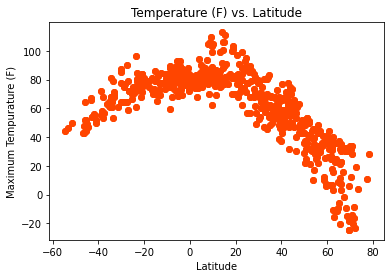

This is a comparison of maximum temperature to latitude of each city in the dataframe.
As the city gets closer to the equator (latitude is closer to zero), the temperatures to rise


In [96]:
# temp v lat
x_values = weather_df['Latitude']

y_values = weather_df['Max Temperature']

plt.scatter(x_values, y_values, color = 'orangered')
plt.xlabel('Latitude')
plt.ylabel('Maximum Tempurature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.tight_layout
plt.show()
print('This is a comparison of maximum temperature to latitude of each city in the dataframe.')
print('As the city gets closer to the equator (latitude is closer to zero), the temperatures to rise')

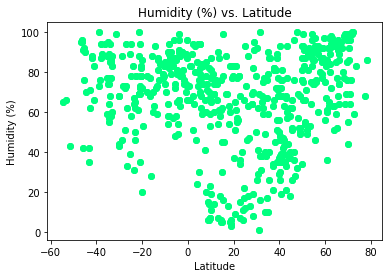

This is a comparison of average humidity to latitude of each city in the dataframe.
The cities with lower humidity are closer to the equator than some of the cities with high humidity.


In [97]:
# hum v lat

y_values = weather_df['Humidity']

plt.scatter(x_values, y_values, color = 'springgreen')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.tight_layout
plt.show()

print('This is a comparison of average humidity to latitude of each city in the dataframe.')
print('The cities with lower humidity are closer to the equator than some of the cities with high humidity.')

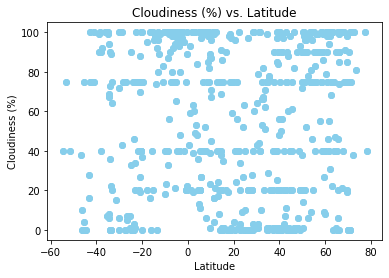

This is a comparison of average cloudiness as a percent to latitude of each city in the dataframe.
There seems to be little correlation between the two.


In [98]:
# cloudiness

y_values = weather_df['Cloudiness']

plt.scatter(x_values, y_values, color = 'skyblue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.tight_layout
plt.show()

print('This is a comparison of average cloudiness as a percent to latitude of each city in the dataframe.')
print('There seems to be little correlation between the two.')

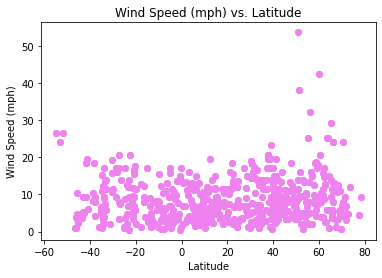

This is a comparison of average wind speed to latitude of each city in the dataframe.
There seems to be little correlation between the two.


In [99]:
# wind speed

y_values = weather_df['Wind Speed']

plt.scatter(x_values, y_values, color = 'violet')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.tight_layout
plt.show()

print('This is a comparison of average wind speed to latitude of each city in the dataframe.')
print('There seems to be little correlation between the two.')

In [93]:
# separate dataframe by hemispheres

north_df = weather_df[weather_df['Latitude'] >= 0]
south_df = weather_df[weather_df['Latitude'] < 0]


# Northern Hemisphere Regression

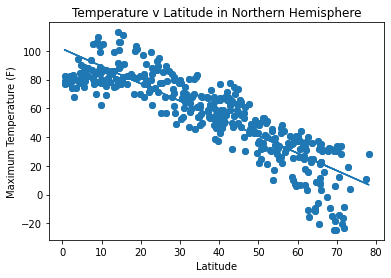

The correlation is: -0.87.
This tells us there is a strong correlation between maximum temperature and distance from the equator
in the Northern hemisphere.
As we move north away from the equator, maximum temperature decreases.


In [140]:
# temp

x_values = north_df['Latitude']

y_values = north_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Temperature v Latitude in Northern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is: {r}.')
print('This tells us there is a strong correlation between maximum temperature and distance from the equator')
print('in the Northern hemisphere.')
print('As we move north away from the equator, maximum temperature decreases.')

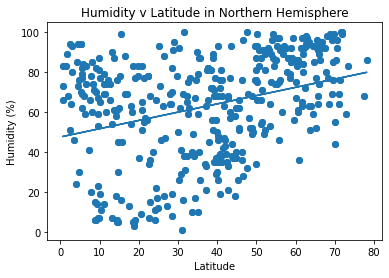

The correlation is: 0.33.
This tells us there is little relationship between humidity and distance from the equator
in the Northern hemisphere.


In [141]:
# humidity

y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity v Latitude in Northern Hemisphere')
plt.tight_layout
plt.show()

print(f"The correlation is: {r}.")
print('This tells us there is little relationship between humidity and distance from the equator')
print('in the Northern hemisphere.')

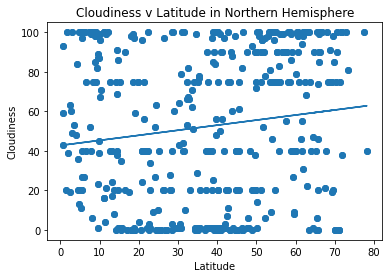

The correlation is: 0.14.
This tells us there is almost no correlation between cloudiness and distance from the equator
in the Northern hemisphere.


In [142]:
# cloudiness

y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness v Latitude in Northern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is: {r}.')
print('This tells us there is almost no correlation between cloudiness and distance from the equator')
print('in the Northern hemisphere.')

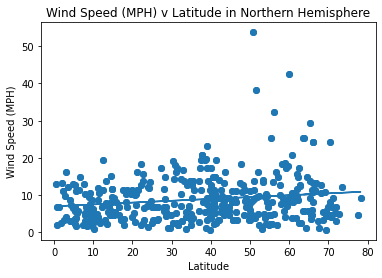

The correlation is: 0.16
This tells us there is almost no correlation between wind speed and distance from the equator
in the Northern hemisphere.


In [143]:
# wind speed

y_values = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed (MPH) v Latitude in Northern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is: {r}')
print('This tells us there is almost no correlation between wind speed and distance from the equator')
print('in the Northern hemisphere.')

# Southern Hemisphere Regression

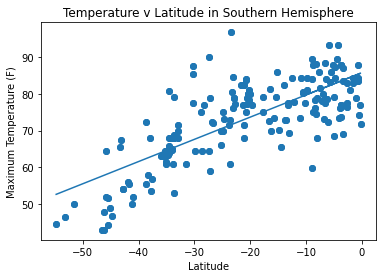

The correlation is: 0.75.
This tells us there is a moderate correlation between maximum temperature and distance from the equator
in the Southern hemisphere
The farther we move from the equator, the lower the maximum temperature.


In [144]:
# temp

x_values = south_df['Latitude']

y_values = south_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Temperature v Latitude in Southern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is: {r}.')
print('This tells us there is a moderate correlation between maximum temperature and distance from the equator')
print('in the Southern hemisphere')
print('The farther we move from the equator, the lower the maximum temperature.')

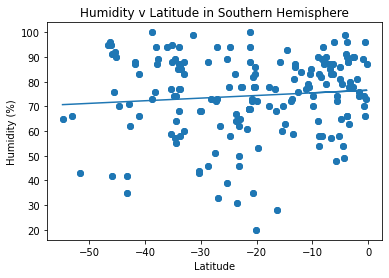

The correlation is 0.09.
This tells us that there is no correlation between humidity and distance from the equator 
in the Southern hemisphere.


In [146]:
# humidity

y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity v Latitude in Southern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is {r}.')
print('This tells us that there is no correlation between humidity and distance from the equator ')
print('in the Southern hemisphere.')

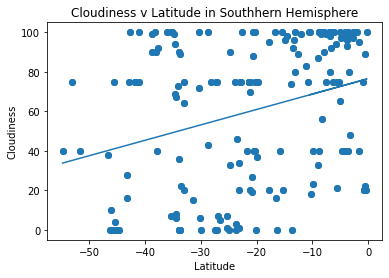

The correlation is: 0.3
There is a weak correlation between cloudiness and distance from the equator
in the Southern hemisphere.
As we move closer to the equator, cloudiness may increase.


In [150]:
# cloudiness

y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness v Latitude in Southhern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is: {r}')
print('There is a weak correlation between cloudiness and distance from the equator')
print('in the Southern hemisphere.')
print('As we move closer to the equator, cloudiness may increase.')

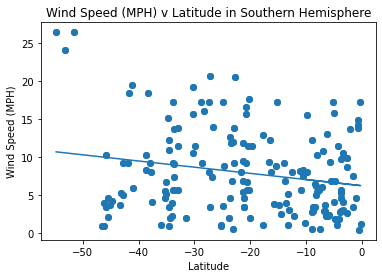

The correlation is: -0.21
There isvery little correlation between wind speed and distance from the equator
in the Southern hemisphere.


In [151]:
# wind speed

y_values = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed (MPH) v Latitude in Southern Hemisphere')
plt.tight_layout
plt.show()

print(f'The correlation is: {r}')
print('There isvery little correlation between wind speed and distance from the equator')
print('in the Southern hemisphere.')